Dear Participant,

Please find below the Project for Supervised Learning course. This is an individual assignment. Kindly submit it before it's deadline.

Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt

Assignment Expectations/Steps -

1. Import and store the data in a data frame. (2.5 points)

2. Remove the outliers from the data (5 points)

3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

7. Print the coefficients & intercepts of the linear regression model (5 points)

8. Print the accuracy of the overall model (2.5 points)

Github link: 

Please Note:

Total marks allotted for this assignment is 30.
Assignment final submission should be a URL to your Github repository.
Regards,

Program Office

# Que 1: Import and store the data in a data frame. 
(2.5 points)

In [2]:
# Import required libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
#data=pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat',sep='\s+',header=None)
data=pd.read_csv('airq402.dat',sep='\s+',header=None)
data.sample(4)

,0,1,2,3,4,5,6,7,8,9,10
771,MKE,IAD,160.42,634,333.91,YX,67.35,170.77,FL,1.56,118.41
686,LAS,SAT,146.45,1069,462.50,WN,77.95,144.95,HP,7.59,141.27
803,BNA,TPA,128.97,612,442.17,WN,83.70,125.31,WN,83.70,125.31
362,CMH,FLL,141.32,972,263.91,DL,42.00,149.57,WN,29.61,137.51


In [4]:
# Maps columns as per airq402.dat
data.columns=['City1','City2','AvgFare',
              'Distance','AvgWeeklyPasse',
              'MarketLeadingAirline','MarketShareMLA',
              'AvgFareMLA','LowPriceAirline','MarketShareLPA','PriceLPA'
             ]

In [5]:
# Convert catagorical data to numberic categories
data['City1']=data['City1'].astype(str).astype('category').cat.codes
data['City2']=data['City2'].astype(str).astype('category').cat.codes
data['MarketLeadingAirline']=data['MarketLeadingAirline'].astype(str).astype('category').cat.codes
data['LowPriceAirline']=data['LowPriceAirline'].astype(str).astype('category').cat.codes
data=data.astype('float64')
data.sample(5).T

,837,768,311,369,260
City1,45.00,54.00,63.00,20.00,63.00
City2,73.00,58.00,74.00,35.00,8.00
AvgFare,365.93,159.48,174.72,166.16,94.32
Distance,2586.00,1460.00,1838.00,483.00,316.00
AvgWeeklyPasse,3470.76,464.78,756.84,876.19,1946.63
MarketLeadingAirline,12.00,8.00,12.00,3.00,14.00
MarketShareMLA,41.22,38.98,38.21,35.19,37.46
AvgFareMLA,386.70,161.75,175.94,184.51,74.16
LowPriceAirline,5.00,12.00,14.00,6.00,17.00
MarketShareLPA,21.72,15.76,18.62,15.74,37.46


# Que 2: Remove the outliers from the data
(5 points)

**Understanding What are Outliers?**

An outlier is an observation that is unlike the other observations.

It is rare, or distinct, or does not fit in some way.

Outliers can have many causes, such as:

Measurement or input error.
Data corruption.
True outlier observation (e.g. Michael Jordan in basketball).

There are various ways to ideity outliners, however **Interquartile Range (IQR)** is important because it is used to define the outliers. It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). 

Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                   1000 non-null float64
City2                   1000 non-null float64
AvgFare                 1000 non-null float64
Distance                1000 non-null float64
AvgWeeklyPasse          1000 non-null float64
MarketLeadingAirline    1000 non-null float64
MarketShareMLA          1000 non-null float64
AvgFareMLA              1000 non-null float64
LowPriceAirline         1000 non-null float64
MarketShareLPA          1000 non-null float64
PriceLPA                1000 non-null float64
dtypes: float64(11)
memory usage: 86.0 KB


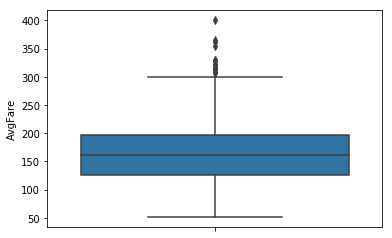

In [7]:
# Have a graphical view of data to identify if it does has outliners
sns.boxplot(data.AvgFare,orient='v')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
City1,1000.0,35.66600,23.275270,0.00,14.0000,31.000,55.2500,89.00
City2,1000.0,50.20100,22.355634,0.00,33.0000,52.500,72.0000,84.00
AvgFare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
AvgWeeklyPasse,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
MarketLeadingAirline,1000.0,8.14700,5.363222,0.00,3.7500,10.000,14.0000,15.00
MarketShareMLA,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
AvgFareMLA,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
LowPriceAirline,1000.0,10.07900,6.065274,0.00,6.0000,10.000,16.0000,18.00
MarketShareLPA,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00


**Outliers** in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

In [9]:
q1=np.percentile(data.AvgFare,25)
q3=np.percentile(data.AvgFare,75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print('q1 = ',q1,' q3 = ',q3)
print('iqr = ',iqr)
print('LB = ',lower_bound," UB = ",upper_bound)

q1 =  125.975  q3 =  197.39249999999998
iqr =  71.41749999999999
LB =  18.84875000000001  UB =  304.51874999999995


In [10]:
count_lower_bound=data.AvgFare[data.AvgFare<lower_bound].count()
count_upper_bound=data.AvgFare[data.AvgFare>upper_bound].count()
print('Total Records                :',data.AvgFare.count(),'\n'
      'Total outliner on lower side :',count_lower_bound,'\n'
      'Total outliner on upper side :',count_upper_bound)

Total Records                : 1000 
Total outliner on lower side : 0 
Total outliner on upper side : 15


**Observation :** Here have a quick look to data if this is specific data which is mistakenly categorized as outliners

In [11]:
data[data.AvgFare>upper_bound]

,City1,City2,AvgFare,Distance,AvgWeeklyPasse,MarketLeadingAirline,MarketShareMLA,AvgFareMLA,LowPriceAirline,MarketShareLPA,PriceLPA
197,10.0,33.0,314.01,2611.0,1259.02,0.0,38.28,345.48,0.0,38.28,345.48
212,10.0,68.0,307.42,2588.0,355.21,0.0,46.69,316.03,10.0,11.84,288.50
213,10.0,73.0,355.15,2704.0,1270.00,12.0,45.88,410.14,0.0,23.38,387.94
328,23.0,33.0,321.40,1900.0,251.08,4.0,75.67,343.53,12.0,4.02,198.06
607,39.0,73.0,313.22,1656.0,467.60,3.0,60.76,354.08,10.0,10.34,212.29
709,44.0,44.0,330.28,2342.0,680.86,0.0,54.42,353.23,10.0,11.95,215.30
714,44.0,35.0,317.20,2475.0,5680.65,0.0,29.35,382.59,5.0,18.13,276.99
737,44.0,25.0,361.57,2311.0,1379.45,12.0,51.73,419.95,0.0,24.46,355.48
760,53.0,73.0,327.45,2585.0,404.78,0.0,47.04,366.46,15.0,28.22,316.15
836,45.0,68.0,314.66,2446.0,1150.10,3.0,30.79,362.41,10.0,15.37,243.25


**Observations :** From above iteration we can clearly figure out their is no outliers on lower side however there are around 15 records in upper outliers range which could impact data, consider data volume of 1000 records vs 15 records in upper outlier and reviwing what type of records are there in these outliers list we can drop them from our list

In [12]:
#Drop outlier rows
data=data[data.AvgFare<upper_bound]
data.AvgFare.count()

985

# Que 3: Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. 
(2.5 points)

**Steps** 

To consider Average Fare ( AvgFare ) as dependent column, 
we have to remove the same from base data and split it in two sets, 

x contains all data from dataframe excluding dependent variable, and 

y contains only Dependent variable (AvgFare)

In [13]:
x=data.drop(['AvgFare'],axis=1)
y=data['AvgFare']
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 999
Data columns (total 10 columns):
City1                   985 non-null float64
City2                   985 non-null float64
Distance                985 non-null float64
AvgWeeklyPasse          985 non-null float64
MarketLeadingAirline    985 non-null float64
MarketShareMLA          985 non-null float64
AvgFareMLA              985 non-null float64
LowPriceAirline         985 non-null float64
MarketShareLPA          985 non-null float64
PriceLPA                985 non-null float64
dtypes: float64(10)
memory usage: 84.6 KB


In [14]:
x.shape, y.shape

((985, 10), (985,))

# Que 4: Drop the independent variables which has less than 0.1 correlation with the dependent variable 
(5 points)

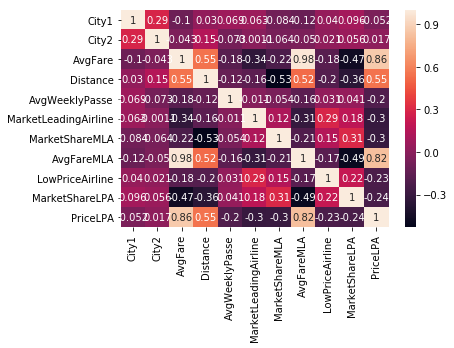

In [15]:
corr=data.corr()
sns.heatmap(corr, annot=True)

In [16]:
corr

,City1,City2,AvgFare,Distance,AvgWeeklyPasse,MarketLeadingAirline,MarketShareMLA,AvgFareMLA,LowPriceAirline,MarketShareLPA,PriceLPA
City1,1.000000,0.286864,-0.102184,0.029924,0.069232,0.062809,-0.084491,-0.117738,0.039749,0.096300,-0.052030
City2,0.286864,1.000000,-0.042980,0.148194,-0.072881,-0.001104,-0.063970,-0.050401,0.020967,0.056059,0.017280
AvgFare,-0.102184,-0.042980,1.000000,0.549345,-0.181844,-0.335253,-0.223965,0.980923,-0.182013,-0.466366,0.863244
Distance,0.029924,0.148194,0.549345,1.000000,-0.124908,-0.163594,-0.530455,0.523250,-0.195158,-0.363031,0.551148
AvgWeeklyPasse,0.069232,-0.072881,-0.181844,-0.124908,1.000000,-0.011046,-0.053690,-0.162596,0.031346,0.041018,-0.203205
MarketLeadingAirline,0.062809,-0.001104,-0.335253,-0.163594,-0.011046,1.000000,0.121250,-0.313731,0.292420,0.181323,-0.304591
MarketShareMLA,-0.084491,-0.063970,-0.223965,-0.530455,-0.053690,0.121250,1.000000,-0.209539,0.148470,0.305621,-0.300354
AvgFareMLA,-0.117738,-0.050401,0.980923,0.523250,-0.162596,-0.313731,-0.209539,1.000000,-0.172995,-0.489843,0.822283
LowPriceAirline,0.039749,0.020967,-0.182013,-0.195158,0.031346,0.292420,0.148470,-0.172995,1.000000,0.215006,-0.226554
MarketShareLPA,0.096300,0.056059,-0.466366,-0.363031,0.041018,0.181323,0.305621,-0.489843,0.215006,1.000000,-0.237469


**Observation** from Correlation we can clearly observe columns having correlation less than 10% i.e 0.1, the same needs to be dropped


In [17]:
data.drop(['City1','City2','AvgWeeklyPasse','MarketLeadingAirline',
           'MarketShareMLA','LowPriceAirline','MarketShareLPA'],
          axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 999
Data columns (total 4 columns):
AvgFare       985 non-null float64
Distance      985 non-null float64
AvgFareMLA    985 non-null float64
PriceLPA      985 non-null float64
dtypes: float64(4)
memory usage: 38.5 KB


# Que 5 : Create scatter Plot of Independent Variable vs Dependent Variable.
(2.5 points)

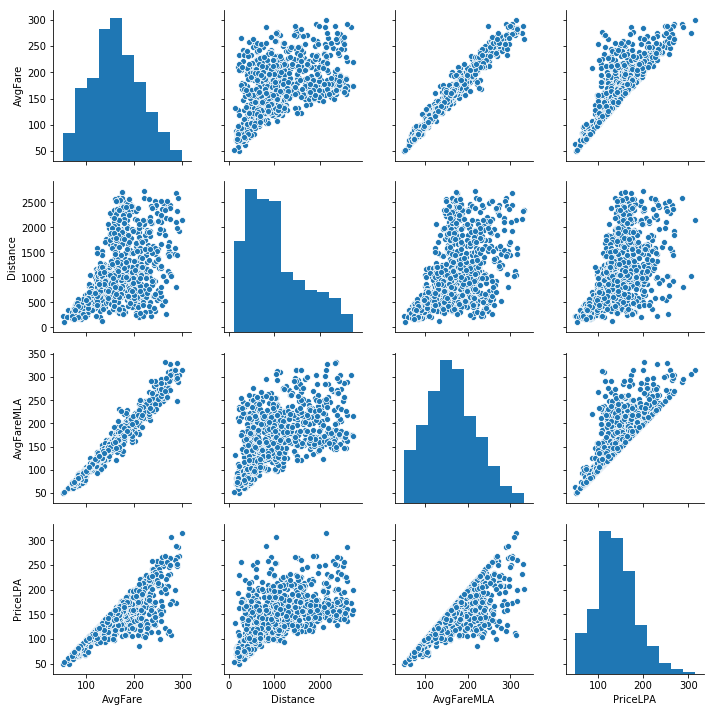

In [18]:
sns.pairplot(data)

# Que 6: Divide the data set into training and test data set and build a Multiple Linear Regression model. 
(5 points)

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=20,random_state=42)
xtrain.sample(10)

,City1,City2,Distance,AvgWeeklyPasse,MarketLeadingAirline,MarketShareMLA,AvgFareMLA,LowPriceAirline,MarketShareLPA,PriceLPA
576,39.0,28.0,862.0,328.15,3.0,69.52,161.59,16.0,1.25,114.31
873,62.0,76.0,389.0,1798.58,14.0,98.90,78.45,17.0,98.90,78.45
932,65.0,74.0,569.0,1144.13,1.0,68.29,94.36,17.0,30.34,91.97
539,31.0,73.0,2583.0,215.97,4.0,30.29,218.07,6.0,30.29,218.07
198,10.0,42.0,1139.0,188.69,10.0,57.60,196.90,16.0,11.46,137.83
550,75.0,25.0,892.0,238.15,4.0,49.93,161.06,0.0,11.27,137.36
119,14.0,3.0,682.0,386.08,14.0,80.46,120.61,17.0,80.46,120.61
701,46.0,25.0,2300.0,580.00,2.0,87.68,161.78,4.0,87.68,161.78
522,31.0,43.0,1263.0,183.26,14.0,46.20,148.16,6.0,25.20,120.60
9,2.0,82.0,1130.0,202.93,13.0,35.40,132.91,6.0,26.40,124.78


In [20]:
xtrain_scaled = preprocessing.scale(xtrain)
xtrain_scaled

array([[-0.92005309,  0.92461053, -0.86213783, ...,  0.31414254,
        -1.14569417, -1.57183836],
       [-1.34875962, -0.0105211 , -0.34250465, ..., -0.84164878,
        -1.01635534, -0.12501362],
       [ 0.40893717,  1.41444138, -0.02689922, ..., -1.00676183,
        -0.20771289, -0.42324175],
       ...,
       [ 1.13773827,  0.65743006, -1.02312848, ...,  0.80948168,
        -1.20651639, -1.51644344],
       [-0.4484759 , -0.9901828 , -0.09384583, ..., -0.51142269,
        -0.05712292, -0.27152752],
       [-1.30588897, -1.48001365, -0.81431883, ..., -1.66721401,
        -1.19625722, -0.67851056]])

In [35]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(xtrain_scaled,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
xtest_scaled=preprocessing.scale(xtest)
test_pred = regressor.predict(xtest_scaled) 
print(test_pred)
pd.DataFrame({'Actual':ytest,'Predicted':test_pred})

[201.17433063 223.08669748 105.66700888 131.44133049 130.51864108
 172.52221533 177.11417301 156.57590329 171.40958429 203.21284283
 213.64325898 153.0163626  105.48345155 101.15873176 115.94921191
 196.36810348 140.72185024  45.53678717 212.0102209  255.03074489]


,Actual,Predicted
618,170.97,201.174331
455,239.88,223.086697
739,123.41,105.667009
440,157.93,131.441330
278,132.86,130.518641
586,178.65,172.522215
713,186.88,177.114173
302,177.35,156.575903
725,189.30,171.409584
498,199.25,203.212843


# Que 7:Print the coefficients & intercepts of the linear regression model 
(5 points)


In [47]:
regressor.coef_

array([ 0.59392457, -0.64947794,  1.62027283, -0.49223294, -1.42655922,
        1.10381594, 41.55059739,  0.75028909, -1.29549099,  9.1717963 ])

In [45]:
regressor.intercept_

160.58207253886007

In [39]:
test_rmse = metrics.mean_squared_error(test_pred, ytest) ** 0.5
print(test_rmse)

17.176461580706203


In [40]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, test_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(ytest, test_pred)))

[201. 223. 106. 131. 131. 173. 177. 157. 171. 203. 214. 153. 105. 101.
 116. 196. 141.  46. 212. 255.]
Mean Absolute Error: 14.559666896693196
Mean Squared Error: 295.0308324334763
Root Mean Squared Error: 17.176461580706206


# Que 8 : Print the accuracy of the overall model
(2.5 points)

In [48]:
# calculate r2 score
from sklearn.metrics import r2_score
r2 = regressor.score(xtrain_scaled, ytrain)

# adjusted r2 using formula adj_r2 = 1 - (1- r2) * (n-1) / (n - k - 1)
# k = number of predictors = X_train_scaled.shape[1] - 1
adj_r2 = 1 - (1-r2)*(len(xtrain_scaled) - 1) / (len(xtrain_scaled) - (xtrain_scaled.shape[1] - 1) - 1)
print(r2, adj_r2)

0.9741873736061645 0.9739441132527147
